# Outliers
## Libraries and Datasets


In [14]:
source("https://raw.githubusercontent.com/eogasawara/mylibrary/master/myclustering.R")
load(url("https://github.com/eogasawara/mylibrary/raw/master/data/iris.RData"))

irisn <- iris
irisn$Species <- NULL

outliers by boxplot

In [15]:
out <- outliers.boxplot(iris)
myiris <- iris[!out,]
head(iris[out,])
boutliers <- which(out==TRUE)
print(boutliers)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
16,5.7,4.4,1.5,0.4,setosa
33,5.2,4.1,1.5,0.1,setosa
34,5.5,4.2,1.4,0.2,setosa
61,5.0,2.0,3.5,1.0,versicolor


[1] 16 33 34 61


Outliers by clustering

 [1]  16  42  58  61  88  94  99 106 107 108 109 110 118 119 123 126 130 131 132
[20] 135 136 149


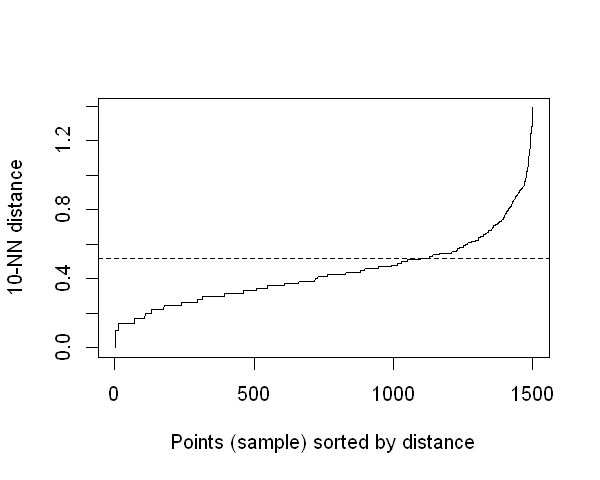

In [16]:
t <- sort(dbscan::kNNdist(irisn, k =  10))
cm <- curvature.max(c(1:length(t)),t, do_plot=FALSE)
options(repr.plot.width=5, repr.plot.height=4)
dbscan::kNNdistplot(irisn, k =  10)
abline(h = cm$y, lty = 2)
dbs3n <- fpc::dbscan(irisn, eps = cm$y, MinPts = 10)
irisn$cluster <- dbs3n$cluster
dbsoutliers = which(irisn$cluster == 0)
print(dbsoutliers)

Outliers by local outlier factors

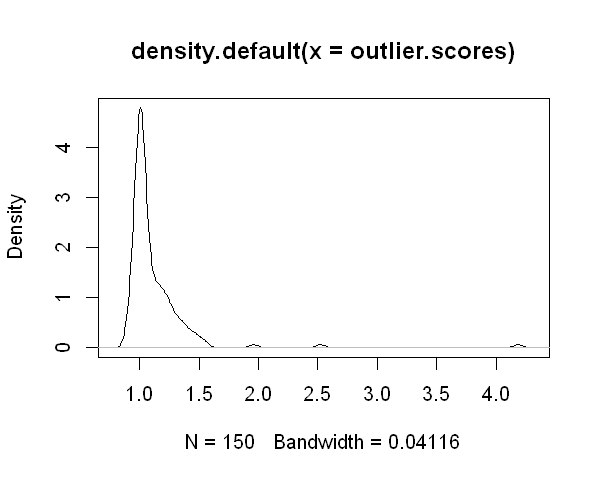

[1] 42 16 23 63 25


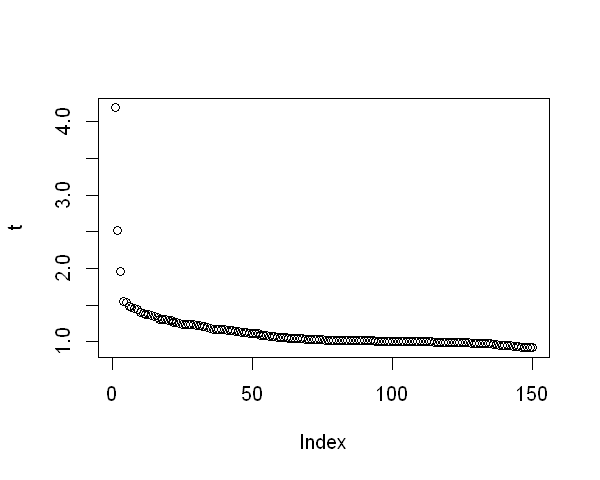

In [17]:
outlier.scores <- lofactor(irisn, k=5)
plot(density(outlier.scores))
t <- sort(outlier.scores, decreasing=T)
plot(t)
looutliers <- order(outlier.scores, decreasing=T)[1:5]
print(looutliers)

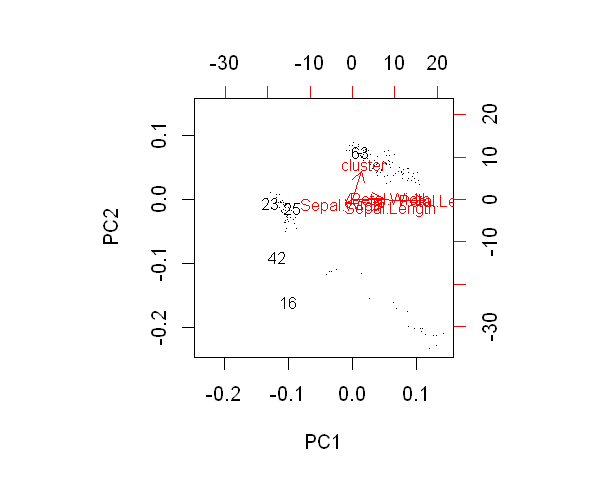

In [18]:
n <- nrow(irisn)
labels <- 1:n
labels[-looutliers] <- "."
biplot(prcomp(irisn), cex=.8, xlabs=labels)

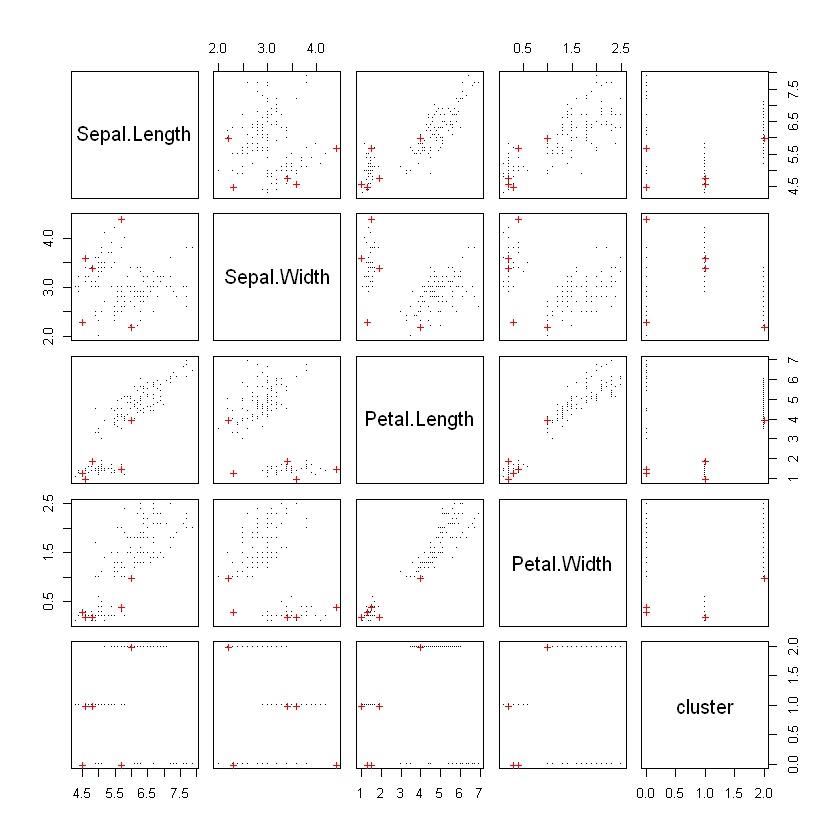

In [19]:
pch <- rep(".", n)
pch[looutliers] <- "+"
col <- rep("black", n)
col[looutliers] <- "red"
options(repr.plot.width=7, repr.plot.height=7)
pairs(irisn, pch=pch, col=col)

Outliers by regression

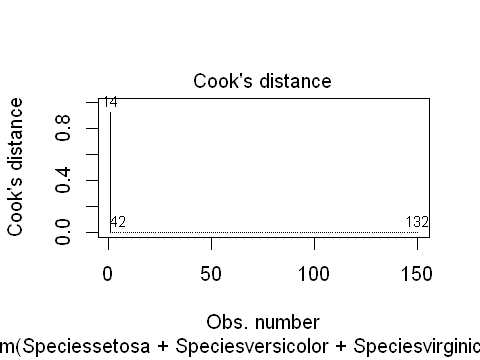

In [20]:
mycm <- dt.categ_mapping(iris, "Species")
mycm <- mycm[with(mycm, order(Sepal.Length, Sepal.Width, Petal.Length, Petal.Width)),]
mod <- lm(Speciessetosa+Speciesversicolor+Speciesvirginica ~ ., data=mycm)
options(repr.plot.width=4, repr.plot.height=3)
plot(mod,4)
